# Part 1 of Tick Marks, Grids and Labels: Tick Marks - Basics

This page is primarily based on the following page at the Circos documentation site:



- [1. Tick Marks - Basics](????????????)



That page is the first part of the ??? part ['Tick Marks, Grids and Labels' section](http://circos.ca/documentation/tutorials/quick_start/) of [the larger set of Circos tutorials](http://circos.ca/documentation/tutorials/).



Go back to the end of the previous section by clicking [here &#8592;](Highlights_Part9.ipynb).



----



4 --- Tick Marks, Grids and Labels
==================================

1. Tick Marks - Basics
----------------------

::: {#menu4}
[[Lesson](/documentation/tutorials/ticks_and_labels/basics/lesson){.clean}]{.active}
[Images](/documentation/tutorials/ticks_and_labels/basics/images){.normal}
[Configuration](/documentation/tutorials/ticks_and_labels/basics/configuration){.normal}
:::

Ticks, tick labels and grids are defined in the [\<ticks\>]{.syn-block}
block, which can contain any number of [\<tick\>]{.syn-block} blocks,
each defining ticks with a different spacing.

The [\<ticks\>]{.syn-block} block contains global tick parameters, such
as `color`, `multiplier`, `format`, etc. All parameters in the
[\<ticks\>]{.syn-block} block are inherited by each
[\<tick\>]{.syn-block} block, where these parameters can be redefined
specifically for each tick group.

Grids are also defined in [\<ticks\>]{.syn-block} blocks. This is
discussed in another section of this tutorial.

I suggest that you keep your tick configuration in a separate
configuration file, typically `ticks.conf`{.syn-include}, which is
imported into the main configuration using the `<<include ticks.conf>>`
directive.

```ini
# circos.conf
<<include ticks.conf>>
...
```


### toggling tick display

Use `show_ticks` and `show_tick_labels` to control whether ticks and
associated labels are drawn.

```ini
show_ticks       = yes
show_tick_labels = yes
```


Tick labels are drawn only if ticks are drawn. Here, ticks refers to the
radial lines that show progression of distance along the ideogram. Tick
labels are the accompanying text elements that mark the position of the
tick.

If you have a large number of ticks (1000\'s) they can take a while to
draw. You can skip ticks using `-noshow_ticks` flag on the command line.

```ini
> bin/circos -noshow_ticks ...
```


Similarly, you can supress labels with `-noshow_tick_labels`.

### global and local tick parameters

The [\<ticks\>]{.syn-block} block contains global tick parameters and
individual [\<tick\>]{.syn-block} blocks that specify how ticks at a
given spacing (absolute or relative) or at a specific position (or
positions) should be formatted.

Global parameters influence every tick. They can be overridden with
different values in individual [\<tick\>]{.syn-block} blocks. The three
basic tick parameters are the tick radius, label multiplier and
orientation.

```ini
<ticks>
```


```ini
... global tick parameters ...
```


```ini
<tick>
... tick level parameters ...
</tick>
```


```ini
<tick>
... tick level parameters ...
</tick>
...
```


```ini
</ticks>
```


### tick radius, multiplier and orientation

The radius specifies the radial position of the tick marks, which you
generally want to set to the outer ideogram radius.

The label multiplier is the constant used to multiply the tick value to
obtain the tick label. For example, if the multiplier is `1e-6`, then
the tick mark at position `10,000,000` will have a label of `10`. The
multiplier is applied to the raw tick value, regardless of the value of
`chromosomes_unit`.

The orientation controls whether the ticks and labels face out
(`orientation=out`) or in (`orientation=in`). For example, you are
drawing ticks at the outer ideogram radius, then an `out` orientation is
appropriate. For ticks drawn at the inside radius, an `in` orientation
should be used to avoid overlapping ticks and labels with the ideogram.

```ini
radius               = dims(ideogram,radius_outer)
label_multiplier     = 1e-6
orientation          = out
```


Note that for the radius, you can specify the radius by using the
parsable `dims()` keyword. This keyword takes two arguments, feature and
feature parameter. In this case, I\'ve asked that the ticks be drawn at
the outer radius of the ideogram. If you would like to shift the ticks
away from this position, you can add a pixels offset. For example,

```ini
radius               = dims(ideogram,radius_outer) + 25p
```


would draw the the ticks at 25 pixels from the outer ideogram radius.
This feature is useful if you\'d like to draw data between the ideogram
and the tick labels.

A useful trick is to plot the ticks just inside the image radius. By
referencing the position relative to the image, and not the ideogram,
you decouple the position of the tick from the position of the ideogram.
This absolute placement is useful if you know you want the ticks at a
specific image position, regardless of the position of the ideograms.

```ini
radius               = dims(image,radius) - 25p
```


As you\'ll see in other tutorials on ticks, you can specify multiple
radius values for ticks. Doing so will create several rings of tick
marks.

### tick spacing

The location of ticks is controled by spacing (distance between adjacent
ticks is fixed) or by specific position. Spacing can be either absolute
(e.g. tick every 1Mb) or relative (tick every 1% of ideogram length).

Typically, one defines several sets of ticks by using
[\<tick\>]{.syn-block} blocks. Each set defines the display of ticks at
a given spacing. For example, one could have three sets of ticks spaced
at 1Mb, 5Mb and 10Mb, respectively, and formatted so that the 1Mb ticks
are small and without labels whereas the 5Mb and 10Mb be larger and with
labels. The 10Mb ticks might use a bolder font, for example, to give
them greater visual weight.

Absolute spacing of ticks can be defined in units of bases (`b`, the
natural unit along the ideogram) or chromosome units (`u`, whose size is
defined by the chromosomes\_units parameter). In the definition below,
if `chromosomes_units=10_000_000` then the ticks are spaced at 10Mb, 5Mb
and 1Mb (10u, 5u and 1u).

```ini
<ticks>
```


```ini
radius               = dims(ideogram,radius_outer)
multiplier           = 1e-6
```


```ini
<tick>
spacing = 10u
... parameters for ticks every 10u (=10Mb)...
</tick>
```


```ini
<tick>
spacing = 5u
... parameters for ticks every 5u (=5Mb)...
</tick>
```


```ini
<tick>
spacing = 1u
... parameters for ticks every 1u (=1Mb)...
</tick>
```


```ini
</ticks>
```


Tick marks are drawn in descending order of spacing. Therefore, for this
example, the 10u ticks are drawn first, then all 5u ticks (except those
already drawn every 10u) are drawn down, and then finally the 1u ticks.
Unless force\_display is set for a tick set, ticks at smaller spacing
are not drawn at a position that already has another tick. In other
words, the formatting of a tick mark is defined by the block associated
with the spacing value that defines the largest divisor of the tick
value.

Tick marks for positions outside of the range of the ideogram are not
drawn. This applies in particular to cases where a chromosome is
represented by multiple ideograms with axis breaks - there will be no
ticks inside the region of the axis break.

::: {.issuebox}
Avoid defining too many ticks, which can take a long time to draw. Use
the right combination of `chromosomes_units` and tick spacing. A common
error is to set `chromosomes_units=1` and have a [\<tick\>]{.syn-block}
block with `spacing=1u` and then apply this to a human chromosome, in
effect asking for a tick at every base (e.g. 250,000,000 ticks on
chromosome 1).
:::

### tick parameters

The basic tick parameters are as follows. Note that most of the values
require that a unit be provided (`p` = pixel, `r` = relative, `u` =
chromosome unit). Other parameters, such as those that control relative
spacing, are covered in other tick tutorials.

-   `spacing` - the distance between the ticks in this set and should be

```ini
expressed in units of `chromosomes_units` (`u`) or bases (`b`).
```


-   `chromosomes` - optional list of ideograms on which ticks are drawn

```ini
or are suppressed
```


-   `size` - the length of the tick line, in pixels (`p`) or relative

```ini
(`r`) to thickness of ideogram
```


-   `thickness` - the thickness of the tick line, in pixels (`p`) or

```ini
relative (`r`) to the size of the tick
```


-   `color` - the color of the tick line and its label
-   `show_label` - toggles display of the tick\'s associated label and

```ini
is functional only if `show_tick_labels` is set
```


-   `label_size` - controls the size of the tick\'s label in pixels

```ini
(`p`) or relative (`r`) to the size of the tick
```


-   `label_offset` - additional padding between the label and end of the

```ini
tick mark, in pixels (`p`) or relative (`r`) to the size of the tick
```


-   `format` - a printf style format applied to the label of the tick

```ini
(e.g. `%d` for integer, `%.nf` for n-decimal float).
```


Finally a quick note about relative units. You\'ll note that `size` is a
parameter than can be expressed in relative units (e.g. `0.2r`). This
parameter, when thus expressed, is calculated relative to another
quantity.

When tick size is expressed in relative terms, the comparator is the
tickness of the ideogram. Therefore ticks with `size=0.1r` will have a
length that is 1/10th of the ideogram thickness. Tick thickness, on the
other hand, uses the tick size as the comparator. Thus, ticks with
`thickness=0.1r` will have a width that is 1/10th the size of their
length. Similarly, if tick label size is defined relatively, it will be
scaled by tick size.

The purpose of relative values is to reduce the work required to alter
the configuration file when the size of the output bitmap image changes.
For example, if you define all tick size values in relative terms, to
maintain ticks of the same proportion you only need to change the
ideogram thickness when the image size changes.

### toggling tick display by ideogram

You can selectively suppress ticks for individual ideograms, or a range
on any ideogram. There are two parameters in the [\<ticks\>]{.syn-block}
block, as well as in \<tick\> blocks, that control this.

```ini
<ticks>
# ticks will be displayed on every ideogram by default
chromosomes_display_default = yes
# all ticks will be suppressed on ideogram hs1 and in region
# 0-50Mb on hs2 (range is expressed in units of chromosomes_unit),
# and in region 100Mb+ on hs3
chromosomes = -hs1;-hs2:0-50;-hs3:100-)
...
</ticks>
```


An example of this kind of tick mark suppression is shown in the first
image in this tutorial. You can individually suppress individual ticks
by adding a chromosomes parameter to the [\<tick\>]{.syn-block} block.
For example, to remove 10Mb tick marks from hs2

```ini
<ticks>
chromosomes_display_default = yes
chromosomes = -hs1;-hs2:0-100;-hs3:100-)
```


```ini
<tick>
spacing     = 10u
chromosomes = -hs2
...
</tick>
```


```ini
...
</ticks>
```


When defining regions in which tick marks are not shown (these are
entries prefixed by `-` such as `-hs1`), the regions in the
[\<ticks\>]{.syn-block} block combine with regions in the
[\<tick\>]{.syn-block} blocks in the OR sense (as sets, the union is
computed).

When `chromosomes_display_default=yes`, you do not need to define which
ideograms ticks appear on because tick mark visibility is on by default
and you only need to define where tick marks are not shown.

If `chromosomes_display_default=no`, then things get a little bit more
complicated, because you now need to define where tick marks will be
shown and these definitions can contain regions of exclusion.

To show ticks only on specific ideograms or regions,

```ini
<ticks>
# ticks will not be displayed on every ideogram by default
chromosomes_display_default = no
# ticks only on these ideograms and/or regions
chromosomes = hs1;hs2:0-100;hs3:100-)
...
</ticks>
```


You can combine regions where tick marks should be shown with regions of
exclusion within individual [\<tick\>]{.syn-block} blocks to
specifically control where ticks are drawn.

```ini
<ticks>
# ticks will not be displayed on every ideogram by default
chromosomes_display_default = no
# ticks only on these ideograms and/or regions
chromosomes = hs1;hs2:0-100;hs3:100-)
```


```ini
<tick>
spacing     = 5u
chromosomes = hs4
</tick>
```


```ini
<tick>
spacing     = 10u
chromosomes = -hs2;hs5
</tick>
```


```ini
</ticks>
```


----

### Generating the plot produced by this example code


The following two cells will generate the plot. The first cell adjusts the current working directory.

In [1]:
%cd ../circos-tutorials-0.67/tutorials/4/1/

/home/jovyan/circos-tutorials-0.67/tutorials/4/1


In [2]:
%%bash
../../../../circos-0.69-6/bin/circos -conf circos.conf

debuggroup summary 0.40s welcome to circos v0.69-6 31 July 2017 on Perl 5.022000
debuggroup summary 0.41s current working directory /home/jovyan/circos-tutorials-0.67/tutorials/4/1
debuggroup summary 0.41s command ../../../../circos-0.69-6/bin/circos -conf circos.conf
debuggroup summary 0.41s loading configuration from file circos.conf
debuggroup summary 0.41s found conf file circos.conf
debuggroup summary 0.60s debug will appear for these features: output,summary
debuggroup summary 0.60s bitmap output image ./circos.png
debuggroup summary 0.60s SVG output image ./circos.svg
debuggroup summary 0.60s parsing karyotype and organizing ideograms
debuggroup summary 0.70s karyotype has 24 chromosomes of total size 3,095,677,436
debuggroup summary 0.70s applying global and local scaling
debuggroup summary 0.71s allocating image, colors and brushes
debuggroup summary 2.80s drawing 5 ideograms of total size 1,062,541,965
debuggroup summary 2.80s drawing highlights and ideograms
debuggroup outpu

Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.


View the plot in this page using the following cell.

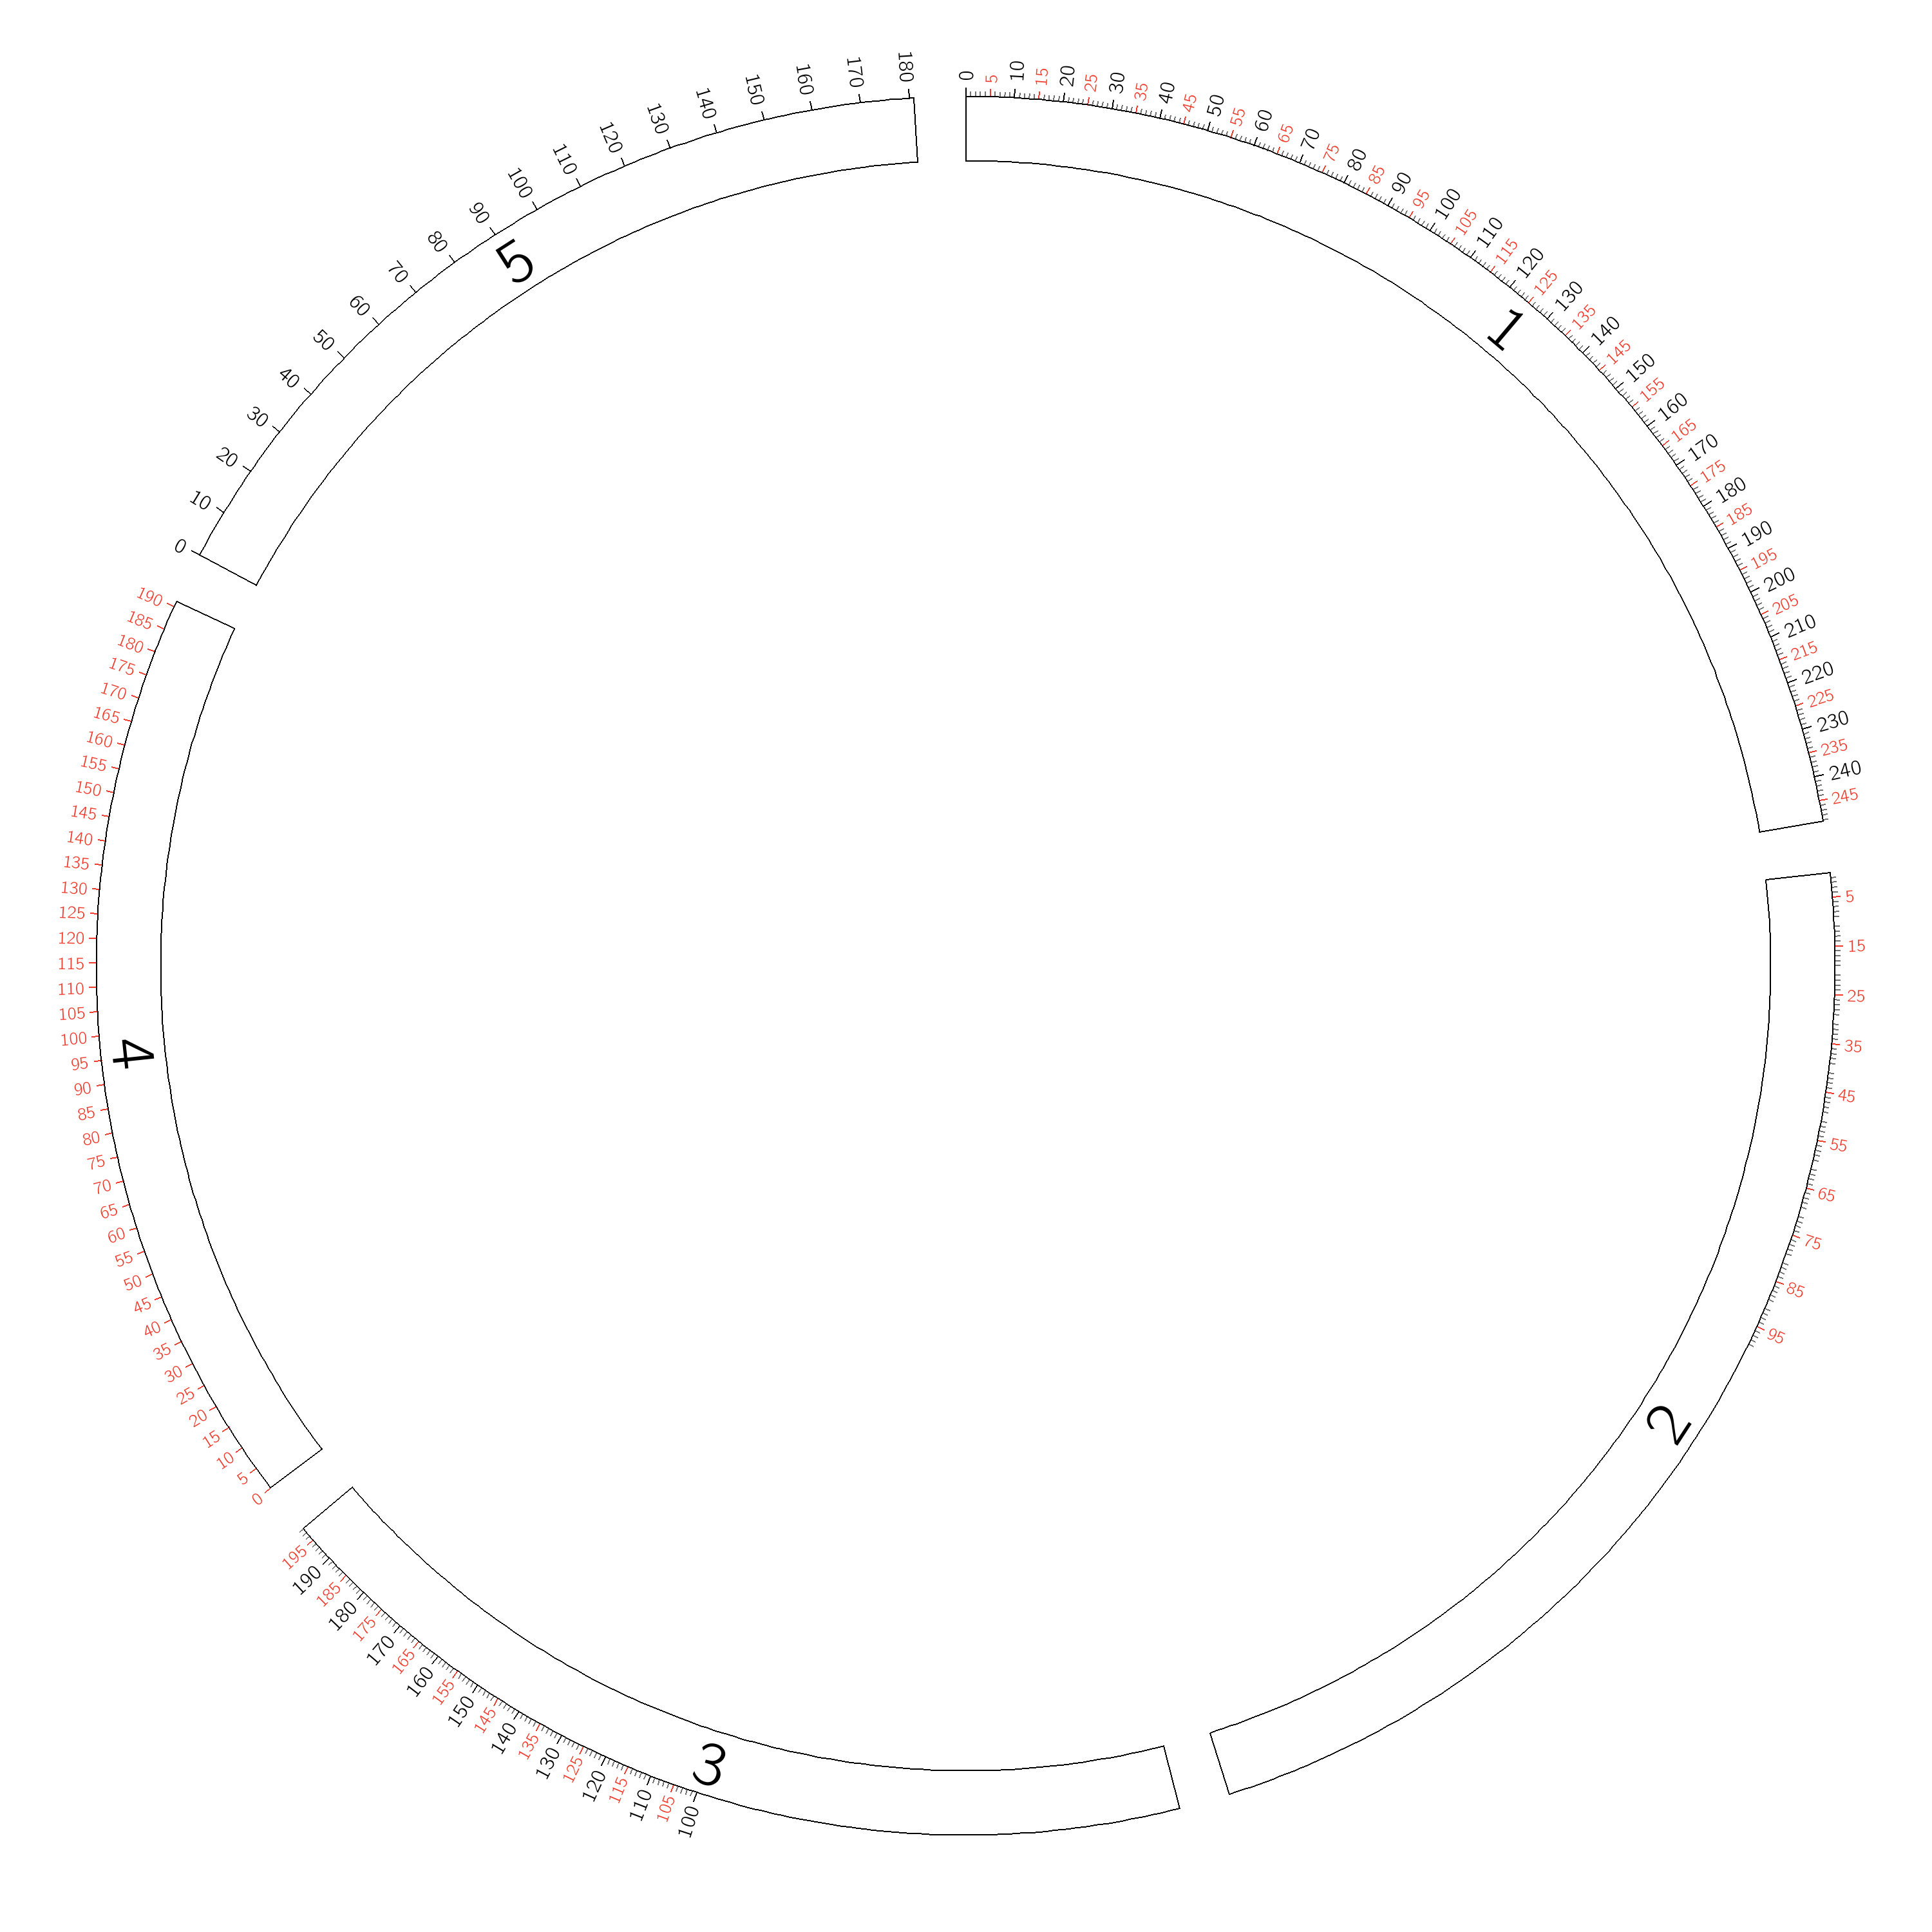

In [3]:
from IPython.display import Image
Image("circos.png")

----

Continue on to the next part of the Tick Marks, Grids and Labels series by clicking [here &#10145;](TickMarks_Part2.ipynb).

----